In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f(x):
    return 3*x**2 -4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

In [6]:
print(ys)

[100.      91.6875  83.75    76.1875  69.      62.1875  55.75    49.6875
  44.      38.6875  33.75    29.1875  25.      21.1875  17.75    14.6875
  12.       9.6875   7.75     6.1875   5.       4.1875   3.75     3.6875
   4.       4.6875   5.75     7.1875   9.      11.1875  13.75    16.6875
  20.      23.6875  27.75    32.1875  37.      42.1875  47.75    53.6875]


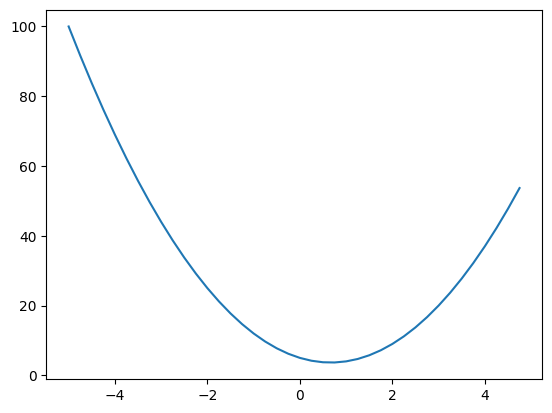

In [7]:
plt.plot(xs,ys)

In [8]:
h = 0.003
x = - 3.0
(f(x+h) -f(x))/h


-21.99099999999987

In [9]:
a = 2.0
b =-3.0
c= 10.0
d= a*b +c
print(d)

4.0


In [10]:
h = 0.0001

a+=h
d2 = a*b +c

In [11]:
print(a)
print(d2)
print((d2-d)/h)

2.0001
3.999699999999999
-3.000000000010772


In [16]:
class Value:
    def __init__(self, data,_children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self.backward = lambda:None
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data + other.data, (self,other),'+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out.backward = _backward
        return out
    
    def __radd__(self,other):
        return self + other

    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data * other.data, (self,other),'*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.grad * out.grad
        out.backward =_backward
        return out
    def __rmul__(self,other):
        return self*other
    def __neg__(self):
        return self * -1

    def __sub__(self,other):
        return self + (-other)

    
    def exp(self):
        x = self.data
        out = Value(math.exp(x),self,'exp')
        def _backward():
            self.grad += out.data * out.grad
        out.backward = _backward
        return out
    def __pow__(self,other):
        assert isinstance(other, (int,float)), "only supporting int/float powers for now"
        out = Value(self.data**other,(self,), f'**{other}')
        def _backward():
            self.grad += (other * (self.data**(other-1))) * out.grad
        out.backward = _backward
        return out
    
    def __truediv__(self,other):
        return self * (other**-1)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x) + 1)
        out = Value(t,(self,),_op ='tanh')
        def _backward():
            self.grad += (1-t**2)*out.grad
        out.backward = _backward
        return out
    def _doBackprop(self):
        self.grad = 1.0
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        for n in reversed(topo):
            n.backward()
        



In [85]:
num1 = Value(2.0,label='num1')
num2 = Value(4.0,label='num2')

num3 = num2 - num1
num3.grad = 1.0
num3._doBackprop()
num1.grad




-1.0

In [68]:
num2

Value(data=-1.0)

In [58]:
num1.grad

12.0

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
from graphviz import Digraph

In [18]:

def trace(root):
    nodes,edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir':'LR'})

    nodes,edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name= uid, label = "{%s | data %.4f | grad %.4f}" % (n.label , n.data, n.grad), shape = 'record')

        if n._op:
            dot.node(name = uid + n._op,label= n._op)
            dot.edge(uid + n._op,uid)

    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)

    return dot




In [33]:
L.grad = 1.0
d.grad = f.data
f.grad = d.data
c.grad = d.grad 
e.grad = d.grad
b.grad = e.grad * a.data
a.grad = e.grad * b.data

iteration 2

Neural net 2 layer

In [19]:
import math

In [8]:
x1 = Value(2.0,label='x1')
x2 = Value(0.0, label='x2')


w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.881375870195432, label='b')

x1w1 = x1*w1
x1w1.label ='x1w1'
x2w2 = x2 * w2
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label ='x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'





In [9]:
o._doBackprop()

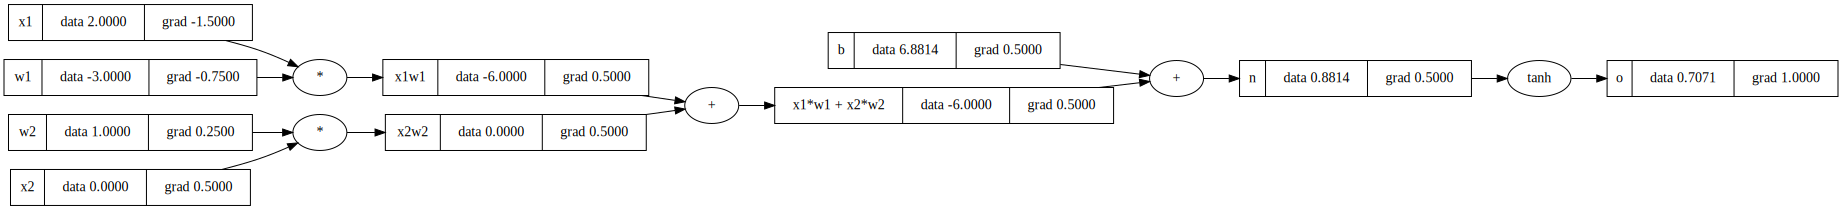

In [10]:
draw_dot(o)

In [15]:
a = Value(2.0,label='a')
b = a+a
b.label='b'

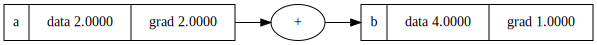

In [16]:
b._doBackprop()
draw_dot(b)

In [86]:
import torch

In [92]:
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True


w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w1.requires_grad = True

b = torch.Tensor([6.881375870195432]).double() ; b.requires_grad = True

n = x1*w1 + x2*w2 + b

o = torch.tanh(n)
print(o.data.item())
o.backward()
print(x2.grad.item())


0.7071078824962277
0.49999844251170106


Making a Neural Network

In [20]:
import random

In [21]:
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1),) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        assert len(x) == len(self.w), "len(x) must be equal to len(w)"
        act =  sum((xi*wi for xi,wi in zip(x,self.w)),self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]

    
class Layer:
    def __init__(self,nin,non):
        self.neurons = [Neuron(nin) for _ in range(non)]

    def __call__(self,x):
        out = [n(x) for n in self.neurons]
        return out[0] if len(out)==1 else out
    def parameters(self):
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters();
            params.extend(ps)
        return params

class MLP:
    def __init__(self,nin,nouts):
        sz = [nin] + nouts 
        self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nouts))] 
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        params = []
        for l in self.layers:
            ps = l.parameters()
            params.extend(ps)
        return params

    
        

            




    
    



In [186]:

o = MLP(3,[4,4,1])





In [187]:
xs = [
    [1.0,2.0,4.0],
    [2.0,3.0,4.0],
    [3.0,4.0,2.0],
    [2.0,3.0,1.0]
]
ys = [1.0,-1.0,-1.0,1.0]




In [184]:
ypred = [o(eg) for eg in xs]
loss = sum((ypred - ys)**2 for ypred,ys in zip(ypred,ys))
print(loss)

for p in o.parameters():
    p.grad = 0.0
        #backward pass
loss._doBackprop()

parameters = o.parameters()

for p in parameters:
    p.data += -0.01 * p.grad
        
print(loss.data)

Value(data=4.018620720051264)
4.018620720051264


In [185]:
ypred

[Value(data=-0.0709287301741343),
 Value(data=-0.0715645710853215),
 Value(data=-0.07286996979806312),
 Value(data=-0.0724597597917847)]

In [188]:
def gradientDescent(xs,o,ys,iter,alpha):
    for step in range(iter):
        #forward pass
        ypred = [o(eg) for eg in xs]
        loss = sum((ypred - ys)**2 for ypred,ys in zip(ypred,ys))

        for p in o.parameters():
            p.grad = 0.0

        #backward pass
        loss._doBackprop()

        parameters = o.parameters()

        for p in parameters:
            p.data += -alpha * p.grad
        
        print(step,loss.data)



        


In [189]:
gradientDescent(xs,o,ys,20,0.01)

0 6.898407555678128
1 5.341835628228119
2 5.169132596080916
3 4.827829928916387
4 4.507353251870398
5 4.261856892008502
6 4.115310995550019
7 4.045609625438961
8 4.01708162527258
9 4.006248940596503
10 4.002264525961282
11 4.00081752770773
12 4.000294680068417
13 4.000106147274203
14 4.000038224023021
15 4.000013762658763
16 4.000004954934862
17 4.000001783848968
18 4.000000642199711
19 4.000000231194661


In [190]:
ypred

[Value(data=-0.0709287301741343),
 Value(data=-0.0715645710853215),
 Value(data=-0.07286996979806312),
 Value(data=-0.0724597597917847)]

In [36]:
n = Neuron(2)
L = Layer(2,2)
L([1,2])



[Value(data=0.8470060728228594), Value(data=0.4539083888917167)]